<a href="https://colab.research.google.com/github/nhquynhhh/IS403_O21_2/blob/week7_hoangmanhthang/Model/RNN/DXG_RNN_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# 1. Import thư viện cần thiết
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [31]:
# 2. Đọc file csv
df = pd.read_csv('DXG-Data.csv')
df

,Date,Price
0,2017-01-03,6066.50
1,2017-01-04,6166.40
2,2017-01-05,6091.50
3,2017-01-06,6141.40
4,2017-01-07,6116.45
...,...,...
2702,2024-05-28,16800.00
2703,2024-05-29,16850.00
2704,2024-05-30,16850.00
2705,2024-05-31,16800.00


In [32]:
df1=df.reset_index()['Price']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2707 non-null   object 
 1   Price   2707 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.4+ KB


In [34]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [35]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [36]:
test_data

array([[0.84170487],
       [0.84170487],
       [0.83162707],
       [0.83777207],
       [0.87341305],
       [0.87341305],
       [0.88078705],
       [0.85940246],
       [0.85940246],
       [0.95206902],
       [0.96190102],
       [0.96435902],
       [0.98525201],
       [0.993855  ],
       [0.97148721],
       [0.97148721],
       [0.97419101],
       [1.        ],
       [0.98402301],
       [0.996313  ],
       [0.993855  ],
       [0.9896764 ],
       [0.9896764 ],
       [0.92257303],
       [0.92994703],
       [0.91519904],
       [0.87095506],
       [0.83408507],
       [0.89455185],
       [0.89455185],
       [0.79875134],
       [0.7652611 ],
       [0.82916907],
       [0.82794007],
       [0.7726351 ],
       [0.79875134],
       [0.79875134],
       [0.79229909],
       [0.73084912],
       [0.67431514],
       [0.64727715],
       [0.70258213],
       [0.70946452],
       [0.70946452],
       [0.67308614],
       [0.70381113],
       [0.73576511],
       [0.728

In [37]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [38]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
# X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [39]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [40]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [41]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 2s 31ms/step - loss: 0.0197 - val_loss: 0.0032
Epoch 2/100
29/29 [==============================] - 1s 22ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/100
29/29 [==============================] - 1s 22ms/step - loss: 8.7417e-04 - val_loss: 9.4867e-04
Epoch 4/100
29/29 [==============================] - 1s 22ms/step - loss: 7.7687e-04 - val_loss: 8.7419e-04
Epoch 5/100
29/29 [==============================] - 1s 32ms/step - loss: 6.6839e-04 - val_loss: 7.4667e-04
Epoch 6/100
29/29 [==============================] - 1s 41ms/step - loss: 6.1069e-04 - val_loss: 6.8989e-04
Epoch 7/100
29/29 [==============================] - 1s 41ms/step - loss: 6.3055e-04 - val_loss: 6.3743e-04
Epoch 8/100
29/29 [==============================] - 1s 41ms/step - loss: 5.3837e-04 - val_loss: 7.4890e-04
Epoch 9/100
29/29 [==============================] - 1s 23ms/step - loss: 5.4892e-04 - val_loss: 6.0586e-04
Epoch 10/100
29/29 [========================

In [42]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

23/23 [==============================] - 0s 7ms/step


In [43]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

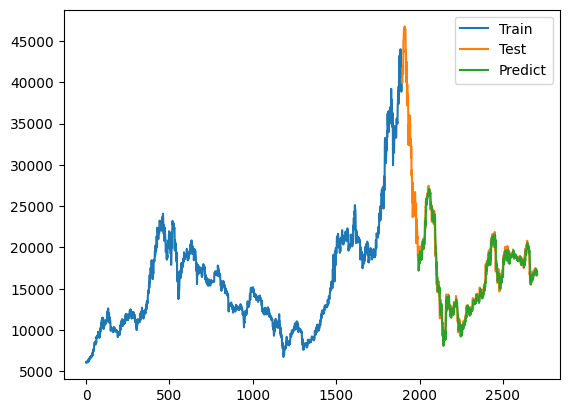

In [44]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

In [45]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [46]:
# prompt: print RMSE, MAPE, MAE using lib

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)


# Calculate MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)

# Calculate MAPE
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE:", mape)


RMSE: 581.1191657791356
MAE: 419.8945663201769
MAPE: 0.02672366095864788


In [56]:
predictions_30 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(30):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_30.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 24ms/step


In [59]:
predictions_60 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(60):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_60.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 26ms/step


In [60]:
predictions_90 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(90):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_90.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 39ms/step


In [61]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred30

array([[16805.94972232],
       [16849.15704605],
       [16735.558983  ],
       [16639.73198695],
       [16675.70454526],
       [16718.48386963],
       [16642.73646973],
       [16484.58524926],
       [16493.29073204],
       [16388.3581405 ],
       [16246.4381593 ],
       [16177.31686851],
       [16132.8776826 ],
       [16176.07166924],
       [16100.26667736],
       [16085.20303974],
       [16066.63962831],
       [16064.26926357],
       [15891.9643588 ],
       [15832.20509939],
       [15742.28219087],
       [15586.05939245],
       [15592.92860035],
       [15465.06773135],
       [15258.67686037],
       [15149.34606008],
       [15018.24367183],
       [14845.34223538],
       [14851.06748464],
       [14734.90991265]])

In [62]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred60=scaler.inverse_transform(predictions_60)

y_pred90=scaler.inverse_transform(predictions_90)


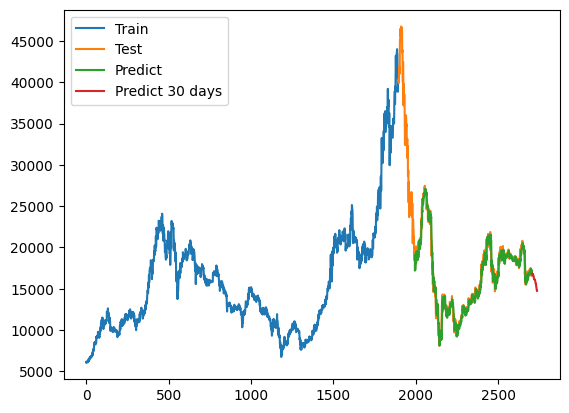

In [63]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_30_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+30, step=1)
plt.plot(predict_30_days,(y_pred30))
plt.legend(['Train','Test','Predict', 'Predict 30 days'])
plt.show()



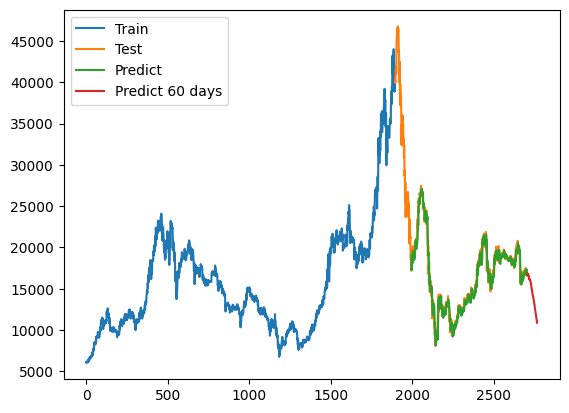

In [64]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_60_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+60, step=1)
plt.plot(predict_60_days,(y_pred60))
plt.legend(['Train','Test','Predict','Predict 60 days',])
plt.show()



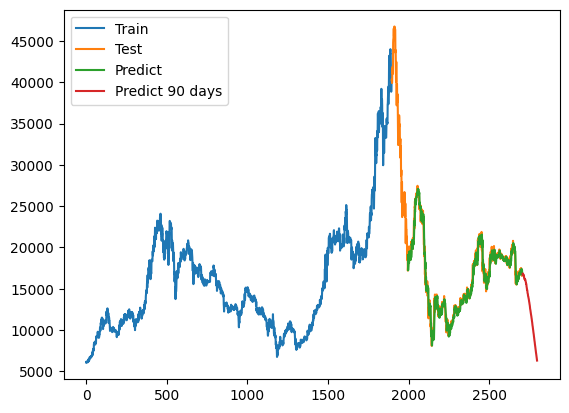

In [65]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_90_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+90, step=1)
plt.plot(predict_90_days,(y_pred90))
plt.legend(['Train','Test','Predict', 'Predict 90 days'])
plt.show()

